## Multivariable Linear Regression

### Import the required imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy
np.set_printoptions(precision = 2)

### Create the follwing Dataset


| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

In [2]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

### w is the vector having n(no of rows) elements 

In [3]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


## 3 Model Prediction With Multiple Variables

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

### Give a prdiction for the single row

In [4]:
def calculate_model_prediction(row_value):
    x_vec = X_train[row_value, :] 
    p = np.dot(w_init, x_vec) + b_init
    
    return p

In [5]:
print(f"The prediction for the first row is: {calculate_model_prediction(0)}")

The prediction for the first row is: 459.9999976194083


In [6]:
X_train

array([[2104,    5,    1,   45],
       [1416,    3,    2,   40],
       [ 852,    2,    1,   35]])

###  Write a function for computing cost

The cost function is
$$J(w, b) = \frac{1}{2m}\sum\limits_{i = 0}^{m - 1}(f_{w, b}(x^{(i)}) - y^{(i)})^{2}$$

In [8]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    
    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        cost += (f_wb - y[i]) ** 2
    cost /= 2 * m

    return cost

In [9]:
print(f"The cost of model with initial values of the parameters is: {compute_cost(X_train, y_train, w_init, b_init)}")

The cost of model with initial values of the parameters is: 1.5578904045996674e-12


## Gradient Descent for Multivariable regression

Gradient Descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where:

$$\begin{align} \frac{\partial J(w, b)}{\partial w_{j}} = \frac{1}{m} \sum \limits_{i = 0}^{m - 1} (f_{w, b} (x)^{(i)} - y^{(i)})x^{(i)}_{j}\newline \\
\frac{\partial J(w, b)}{\partial b} = \frac{1}{m} \sum \limits_{i = 0}^{m - 1} (f_{w, b} (x)^{(i)} - y ^{(i)})
\end{align}$$

* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

## Write a method to compute the gradient

In [14]:
def compute_gradient(x, y, w, b):
    m, n= x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        err = (np.dot(w, x[i]) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * x[i, j]
    
        dj_db += err
        
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

In [15]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]
dj_dw at initial w,b: 
 -1.6739251122999121e-06


### Write a method to compute the gradient descent for multiple variable regression

In [20]:
def gradient_descent_multi(x, y, w, b, gradient_function, cost_function, num_iters=1000, alpha=0.01):
    tmp_w = copy.deepcopy(w)
    tmp_b = b
    J_history = []
    p_history = []
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        tmp_w = tmp_w - alpha * dj_dw
        tmp_b = tmp_b - alpha * dj_db
        
        w = tmp_w
        b = tmp_b
        
        j = cost_function(x, y, w, b)
        if i < 20000:
            J_history.append(j)
            p_history.append([w, b])
            
        if i % math.ceil(num_iters / 10) == 0:
            print(f"iteration: {i}, cost: {j}, dj_dw: {dj_dw}, dj_db: {dj_db}, w: {w}, b: {b}")
        
    return w, b, J_history, p_history
        

In [22]:
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 10000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist, p_history = gradient_descent_multi(X_train, y_train, initial_w, initial_b,
                                                    compute_gradient, compute_cost, 
                                                    iterations, alpha)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

iteration: 0, cost: 2529.4629522316304, dj_dw: [-4.83e+05 -1.12e+03 -3.67e+02 -1.21e+04], dj_db: -290.0, w: [2.41e-01 5.59e-04 1.84e-04 6.03e-03], b: 0.000145
iteration: 1000, cost: 686.6934839275283, dj_dw: [ -3.52  -6.55  22.66 138.8 ], dj_db: 4.60680261702377, w: [ 0.2   0.   -0.01 -0.07], b: -0.0022377109322410465
iteration: 2000, cost: 677.1889369724992, dj_dw: [ -3.36  -6.5   22.35 132.73], dj_db: 4.393101026187234, w: [ 0.21  0.01 -0.02 -0.13], b: -0.0044872374171140445
iteration: 3000, cost: 668.4815829959585, dj_dw: [ -3.22  -6.46  22.05 126.92], dj_db: 4.18869555264818, w: [ 0.21  0.01 -0.03 -0.2 ], b: -0.006632256683207424
iteration: 4000, cost: 660.5035880182975, dj_dw: [ -3.08  -6.42  21.77 121.36], dj_db: 3.993181879578733, w: [ 0.21  0.01 -0.04 -0.26], b: -0.008677314859790265
iteration: 5000, cost: 653.1928903567929, dj_dw: [ -2.94  -6.38  21.5  116.05], dj_db: 3.806173275129576, w: [ 0.21  0.02 -0.06 -0.32], b: -0.010626760350939035
iteration: 6000, cost: 646.492709434

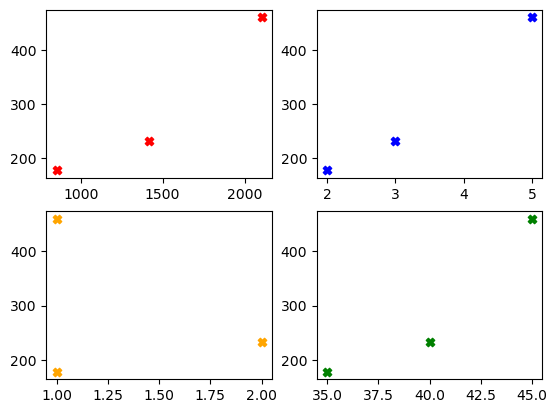

In [30]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].scatter(
    X_train[:, 0],
    y_train,
    marker = "X",
    c = "r",
)
ax[0, 1].scatter(
    X_train[:, 1],
    y_train,
    marker = "X",
    c = "b",
)
ax[1, 0].scatter(
    X_train[:, 2],
    y_train,
    marker = "X",
    c = "orange",
)
ax[1, 1].scatter(
    X_train[:, 3],
    y_train,
    marker = "X",
    c = "g",
)

plt.show()
